In [1]:
# -----------------------------------------------------------------------------------------------------------------------------------
# SAILESH PAUDEL C0813856
# Download Link(Data File):
# https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt


# The downloaded data file is pre-processed and converted into .csv file along with inclusion of column header
# for better readability
# The link to pre-processed data file is:
# https://raw.githubusercontent.com/sailesh3373/data-files/main/BankNote1.csv


# Source:
# https://archive.ics.uci.edu/ml/datasets/banknote+authentication
# Owner of database: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe, volker.lohweg '@' hs-owl.de)
# Donor of database: Helene DÃ¶rksen (University of Applied Sciences, Ostwestfalen-Lippe, helene.doerksen '@' hs-owl.de)
# Date received: August, 2012

# Data Set Information:

# Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

# Attribute Information:

# 1. variance of Wavelet Transformed image (continuous)
# 2. skewness of Wavelet Transformed image (continuous)
# 3. curtosis of Wavelet Transformed image (continuous)
# 4. entropy of image (continuous)
# 5. class (integer)

# -----------------------------------------------------------------------------------------------------------------------------------

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns # --------------------------------- Library for plotting graphs
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.cluster import KElbowVisualizer # ------ Library to visualize optimal value of K
from sklearn.cluster import KMeans # -------------------- Dependent library for KElbowVisualizer
from sklearn import neighbors # ------------------------- Library to implement KNN ML Algorithm
from sklearn.preprocessing import StandardScaler # ------ Used for standarizing the data
from sklearn.model_selection import train_test_split # -- Used for splitting dataset into training and test set
from sklearn import metrics
import warnings # --------------------------------------- Used to hide the warning displayed during some data visualization
warnings.filterwarnings("ignore")

In [3]:
# Importing data into Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/sailesh3373/data-files/main/BankNote1.csv')

<h1>Data Exploration and Visualization </h1>

In [4]:
# Displaying First five rows from our data
df.head()

,variance of WTI,skewness of WTI,curtosis of WTI,entropy of Image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
# Display standard statistical computation like Standard Deviation, Mean, Mode, Quartile Deviation, etc
df.describe()

,variance of WTI,skewness of WTI,curtosis of WTI,entropy of Image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
print(pd.unique(df['class']))
li = list(pd.value_counts(df['class']))
li

[0 1]


[762, 610]

In [7]:
# Checking if the columns have NULL values or not
df.isnull().sum()

variance of WTI     0
skewness of WTI     0
curtosis of WTI     0
entropy of Image    0
class               0
dtype: int64

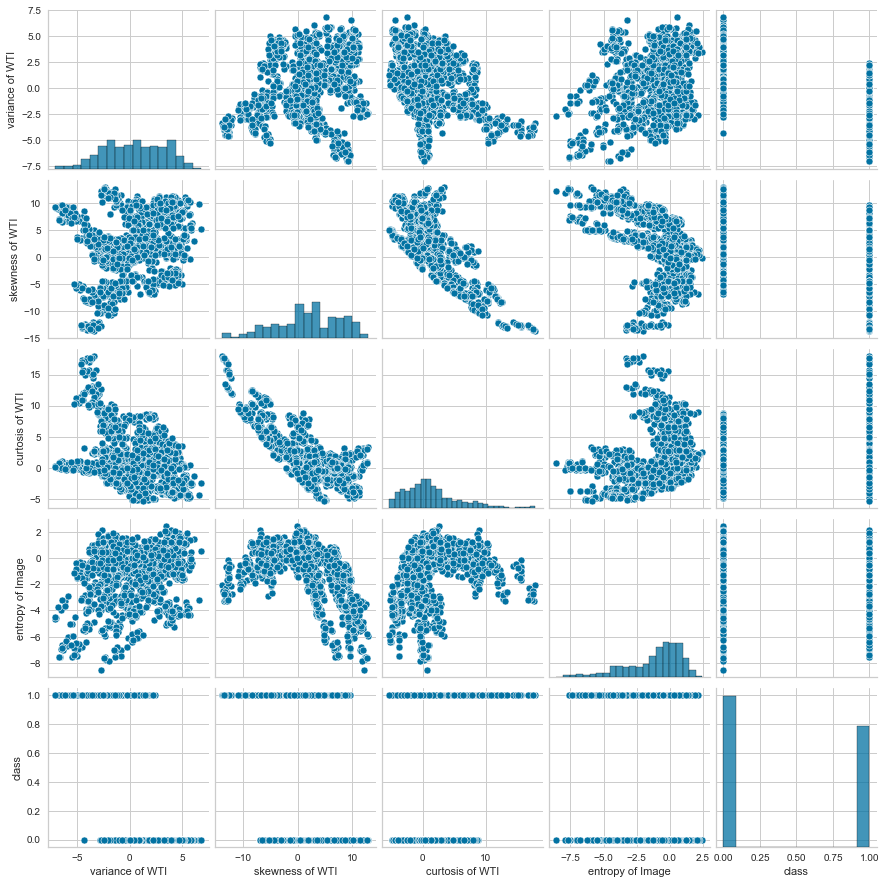

In [8]:
# Genarating Pairplot to visualize the relation(linear, quadratic, cubic) on each variables with other
sns_plot = sns.pairplot(df)

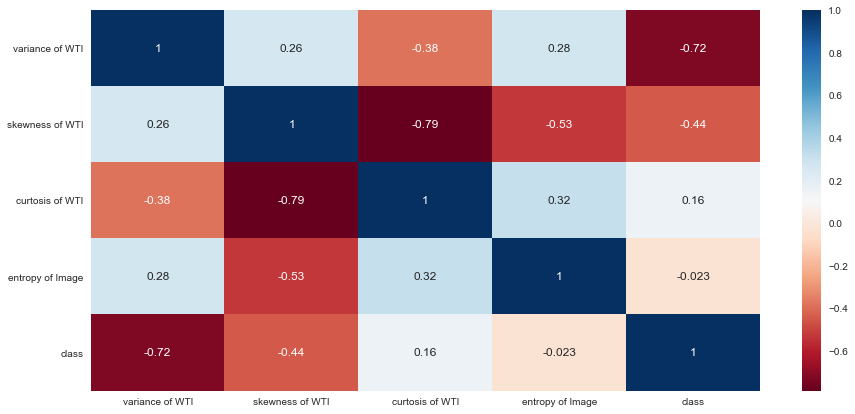

In [9]:
# HeatMap plot to visualize the coorelation between variables
plt.figure(figsize=(15,7))
sns_plot1=sns.heatmap(data=df.corr(), annot=True, cmap='RdBu')
plt.show()

In [10]:
# .corr() function to display the numerical value of corelation so that it can be cross verified with heatmap above
df.corr()

,variance of WTI,skewness of WTI,curtosis of WTI,entropy of Image,class
variance of WTI,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness of WTI,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis of WTI,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy of Image,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


<h4>We can see that variance of WTI and skewness of WTI are higly negatively coorelated to class variable which can be verified on the HeatMap</h4>

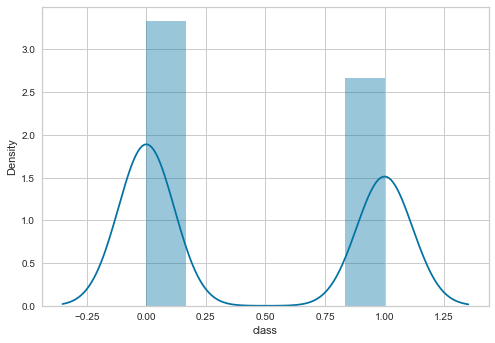

In [11]:
# Distribution plot for class variable to visualize different values in class and its distribution
sns_plot = sns.distplot(df['class'])

<h4> We can see that class variable only contains two values 0 and 1</h4>

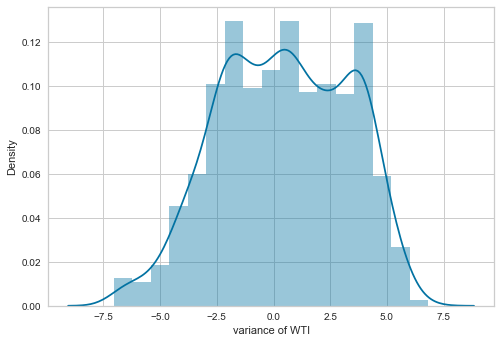

In [12]:
# Distribution plot for variance of WTI variable to visualize its different values and its distribution
sns_plot = sns.distplot(df['variance of WTI'])

<h4> We can see that variance of WTI variable contains continuous value from -7.5 to +7.5 and majority of the values are between -2.5 to 3.0</h4>

<h1> Splitting dataset into training and testing set, also find optimal K</h1>

In [13]:
# X variable
x = df.drop(['class'], axis=1).to_numpy()

In [14]:
x

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [15]:
# Y variable
y = df['class'].to_numpy()

In [16]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

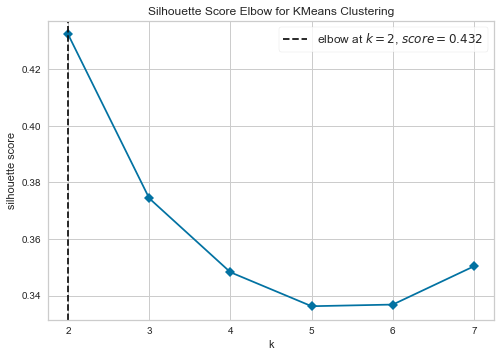

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
kmeans = KMeans(init = 'k-means++', random_state = 100)
   
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(
    kmeans, k=(2,8), metric='silhouette', timings=False
)
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show() 

In [18]:
# Creaing Training and Testing subsets of the main dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=100)

In [19]:
# Normalizing the data
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-0.6903297 , -0.70026104,  0.65842457,  0.67978523],
       [ 0.76370073,  0.2523276 ,  0.14005417,  0.67429093],
       [-0.9560663 ,  0.30468698, -0.49516488, -0.04166506],
       ...,
       [-1.3809412 ,  0.16955772, -0.29691788, -0.02333496],
       [-1.32529399, -0.37801237,  0.16340063,  0.83189677],
       [ 1.13875443, -0.96236565,  0.32514988,  0.21123371]])

<h1>KNN Model Building, Training Model and Predicting Data</h1>

In [23]:
# Even though Elbow graph shows K=2, we put value 0f k=3 in our model to force our model to predict based on 
# 3 neighbours
# Building the KNN Model and fitting it with training dataset
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# The Model built and trained is now used to predict the value of y
y_pred = classifier.predict(x_test)

In [25]:
# Calculating the metrics which denotes the accuracy of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00       194

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453

[[259   0]
 [  0 194]]


<h4> From the classification report and the confusion matrix we can clearly see that our model accurately predicted each variable</h4>